* GRU
* DeepGRU
* BiDirectionalGRU

# **GRU**

## **Sentiment Analysis**

In [ ]:
# importing libraries

import keras
from keras.datasets import imdb
from keras import layers
from keras.preprocessing.sequence import pad_sequences

In [ ]:

# loading the data

max_vocab = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_vocab)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
(25000,)
(25000,)
(25000,)
(25000,)


In [ ]:
# padding
maxlen = 200
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(25000, 200)
(25000, 200)


In [ ]:
# model building

embedding_dim = 64

model = keras.Sequential([
    keras.Input(shape=(maxlen,)),
    layers.Embedding(input_dim=max_vocab, output_dim=embedding_dim),
    layers.GRU(64),
    layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 200, 64)        │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 64)             │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 665,025 (2.54 MB)

 Trainable params: 665,025 (2.54 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# compiling

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    mode='min',
    restore_best_weights=True
)

In [ ]:
# training the model

history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size = 64,
    validation_data=(x_test, y_test),
    callbacks=[early_stopping]
)

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.6949 - loss: 0.5452 - val_accuracy: 0.8546 - val_loss: 0.3424
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.8929 - loss: 0.2714 - val_accuracy: 0.8655 - val_loss: 0.3231
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.9266 - loss: 0.1938 - val_accuracy: 0.8676 - val_loss: 0.3230
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.9466 - loss: 0.1504 - val_accuracy: 0.8470 - val_loss: 0.3608
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9571 - loss: 0.1214 - val_accuracy: 0.8614 - val_loss: 0.3904
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.9747 - loss: 0.0767 - val_accuracy: 0.8616 - val_loss: 0.4640


* We can observe that the model performance increased on test data nearly 87%
* Also the model is overfitting, so the overfitting reducing techniques can be applied

In [ ]:
# evalating test score on test set

test_loss, test_acc = model.evaluate(x=x_test, y=y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

Test Accuracy: 0.8676
Test Loss: 0.3230


Predictions by the GRU model

In [ ]:
# on test sample

sample = 87
pred = model.predict(x_test[sample].reshape(1, -1))[0][0]

print(f"Prediction for {sample}th text: {'Negative' if pred <= 0.5 else 'Positive'}")
print(f"Origin al text label: {'Negative' if y_test[sample] <= 0.5 else 'Positive'}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
Prediction for 87th text: Positive
Origin al text label: Positive


In [ ]:
sample = 98
pred = model.predict(x_test[sample].reshape(1, -1))[0][0]

print(f"Prediction for {sample}th text: {'Negative' if pred <= 0.5 else 'Positive'}")
print(f"Origin al text label: {'Negative' if y_test[sample] <= 0.5 else 'Positive'}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Prediction for 98th text: Negative
Origin al text label: Negative


In [ ]:
# predictions

word_index = imdb.get_word_index()
word_index = {k: (v + 3) for k, v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2
word_index["<UNUSED>"] = 3


def encode_text(text):
    tokens = text.lower().split()
    encoded = [1]  # start token
    for word in tokens:
        encoded.append(word_index.get(word, 2))  # use <UNK> if not found
    return encoded

text = "Movie was bad"
encoded = encode_text(text)
padded = pad_sequences([encoded], maxlen=maxlen, padding="pre")

pred = model.predict(padded)[0][0]
print("Review:", text)
print("Predicted probability:", pred)
print("Sentiment:", "Positive" if pred > 0.5 else "Negative")

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 1s 1us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Review: Movie was bad
Predicted probability: 0.27187735
Sentiment: Negative


In [ ]:
text = "Movie was good"
encoded = encode_text(text)
padded = pad_sequences([encoded], maxlen=maxlen, padding="pre")

pred = model.predict(padded)[0][0]
print("Review:", text)
print("Predicted probability:", pred)
print("Sentiment:", "Positive" if pred > 0.5 else "Negative")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Review: Movie was good
Predicted probability: 0.71442115
Sentiment: Positive


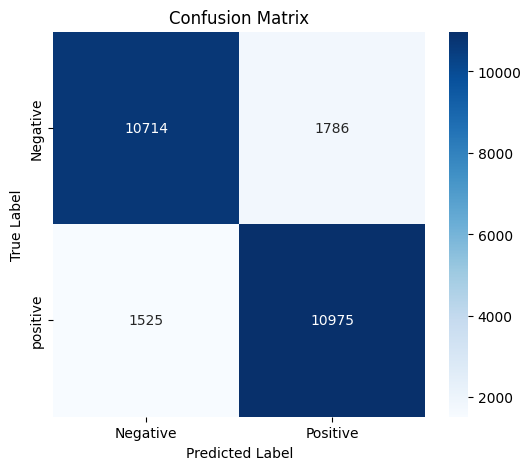

In [ ]:
# confusion matrix for the test data

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

probs = model.predict(x_test, verbose=0)
y_pred = (probs > 0.5).astype(int).ravel()

cm = confusion_matrix(y_true=y_test, y_pred=y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=["Negative", "Positive"],
    yticklabels=["Negative", "positive"]
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# **DeepGRU**

## **Sentiment Analysis**

In [ ]:
# importing libraries

import keras
from keras.datasets import imdb
from keras import layers
from keras.preprocessing.sequence import pad_sequences

In [ ]:
# loading the data

max_vocab = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_vocab)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(25000,)
(25000,)
(25000,)
(25000,)


In [ ]:
# padding
maxlen = 200
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(25000, 200)
(25000, 200)


In [ ]:
# model building

embedding_dim = 64

model = keras.Sequential([
    keras.Input(shape=(maxlen,)),
    layers.Embedding(input_dim=max_vocab, output_dim=embedding_dim),
    layers.GRU(128, return_sequences=True),
    layers.Dropout(0.3),
    layers.GRU(64, return_sequences=True),
    layers.Dropout(0.3),
    layers.GRU(32),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 200, 64)        │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 200, 128)       │        74,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 200, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ (None, 200, 64)        │        37,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 200, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_3 (GRU)                     │ (None, 32)             │         9,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 761,185 (2.90 MB)

 Trainable params: 761,185 (2.90 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# compiling

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    mode='min',
    restore_best_weights=True
)

In [ ]:
# training the model

history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size = 64,
    validation_data=(x_test, y_test),
    callbacks=[early_stopping]
)

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - accuracy: 0.6560 - loss: 0.6047 - val_accuracy: 0.7706 - val_loss: 0.4770
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - accuracy: 0.8012 - loss: 0.4516 - val_accuracy: 0.8279 - val_loss: 0.3952
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - accuracy: 0.8979 - loss: 0.2669 - val_accuracy: 0.8626 - val_loss: 0.3289
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - accuracy: 0.9385 - loss: 0.1817 - val_accuracy: 0.8668 - val_loss: 0.3233
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - accuracy: 0.9588 - loss: 0.1275 - val_accuracy: 0.8695 - val_loss: 0.3805
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - accuracy: 0.9725 - loss: 0.0905 - val_accuracy: 0.8580 - val_loss: 0.4057
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 33ms/step - accuracy: 0.9763 - loss: 0.0808 - val_accuracy: 0.8628 - val_loss: 0.4841


* We can observe that the model performance increased on test data nearly 86%
* Also the model is overfitting, so the overfitting reducing techniques can be applied

In [ ]:
# evalating test score on test set

test_loss, test_acc = model.evaluate(x=x_test, y=y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

Test Accuracy: 0.8668
Test Loss: 0.3233


Predictions by the DeepGRU model

In [ ]:
# on test sample

sample = 87
pred = model.predict(x_test[sample].reshape(1, -1))[0][0]

print(f"Prediction for {sample}th text: {'Negative' if pred <= 0.5 else 'Positive'}")
print(f"Origin al text label: {'Negative' if y_test[sample] <= 0.5 else 'Positive'}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
Prediction for 87th text: Positive
Origin al text label: Positive


In [ ]:
sample = 98
pred = model.predict(x_test[sample].reshape(1, -1))[0][0]

print(f"Prediction for {sample}th text: {'Negative' if pred <= 0.5 else 'Positive'}")
print(f"Origin al text label: {'Negative' if y_test[sample] <= 0.5 else 'Positive'}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Prediction for 98th text: Negative
Origin al text label: Negative


In [ ]:
# predictions

word_index = imdb.get_word_index()
word_index = {k: (v + 3) for k, v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2
word_index["<UNUSED>"] = 3


def encode_text(text):
    tokens = text.lower().split()
    encoded = [1]  # start token
    for word in tokens:
        encoded.append(word_index.get(word, 2))  # use <UNK> if not found
    return encoded

text = "Movie was bad"
encoded = encode_text(text)
padded = pad_sequences([encoded], maxlen=maxlen, padding="pre")

pred = model.predict(padded)[0][0]
print("Review:", text)
print("Predicted probability:", pred)
print("Sentiment:", "Positive" if pred > 0.5 else "Negative")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Review: Movie was bad
Predicted probability: 0.3290823
Sentiment: Negative


In [ ]:
text = "Good movie"
encoded = encode_text(text)
padded = pad_sequences([encoded], maxlen=maxlen, padding="pre")

pred = model.predict(padded)[0][0]
print("Review:", text)
print("Predicted probability:", pred)
print("Sentiment:", "Positive" if pred > 0.5 else "Negative")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Review: Good movie
Predicted probability: 0.8964774
Sentiment: Positive


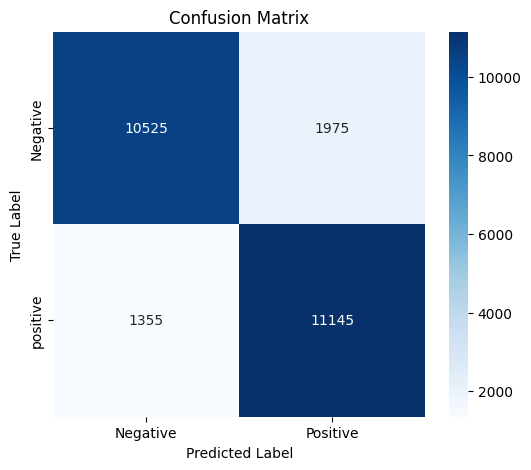

In [ ]:
# confusion matrix for the test data

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

probs = model.predict(x_test, verbose=0)
y_pred = (probs > 0.5).astype(int).ravel()

cm = confusion_matrix(y_true=y_test, y_pred=y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=["Negative", "Positive"],
    yticklabels=["Negative", "positive"]
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# **BiDirectional GRU**

## **Sentiment Analysis**

In [ ]:
# importing libraries

import keras
from keras.datasets import imdb
from keras import layers
from keras.preprocessing.sequence import pad_sequences

In [ ]:
# loading the data

max_vocab = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_vocab)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(25000,)
(25000,)
(25000,)
(25000,)


In [ ]:
# padding
maxlen = 200
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(25000, 200)
(25000, 200)


In [ ]:
# model building

embedding_dim = 64

model = keras.Sequential([
    keras.Input(shape=(maxlen,)),
    layers.Embedding(input_dim=max_vocab, output_dim=embedding_dim),
    layers.Bidirectional(layers.GRU(128, return_sequences=True)),
    layers.Bidirectional(layers.GRU(64)),
    layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 200, 64)        │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 200, 256)       │       148,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 128)            │       123,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 912,769 (3.48 MB)

 Trainable params: 912,769 (3.48 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# compiling

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    mode='min',
    restore_best_weights=True
)

In [ ]:
# training the model

history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size = 64,
    validation_data=(x_test, y_test),
    callbacks=[early_stopping]
)

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 23s 51ms/step - accuracy: 0.6820 - loss: 0.5625 - val_accuracy: 0.8629 - val_loss: 0.3282
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 24s 62ms/step - accuracy: 0.8966 - loss: 0.2626 - val_accuracy: 0.8488 - val_loss: 0.3512
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 61ms/step - accuracy: 0.9380 - loss: 0.1685 - val_accuracy: 0.8722 - val_loss: 0.3094
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 63ms/step - accuracy: 0.9652 - loss: 0.1010 - val_accuracy: 0.8708 - val_loss: 0.3377
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - accuracy: 0.9788 - loss: 0.0650 - val_accuracy: 0.8544 - val_loss: 0.4899
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 25s 63ms/step - accuracy: 0.9843 - loss: 0.0468 - val_accuracy: 0.8586 - val_loss: 0.5682


* We can observe that the model performance increased on test data nearly 87%
* Also the model is overfitting, so the overfitting reducing techniques can be applied

In [ ]:
# evalating test score on test set

test_loss, test_acc = model.evaluate(x=x_test, y=y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

Test Accuracy: 0.8722
Test Loss: 0.3094


Predictions by the BirectionalGRU model

In [ ]:
# on test sample

sample = 87
pred = model.predict(x_test[sample].reshape(1, -1))[0][0]

print(f"Prediction for {sample}th text: {'Negative' if pred <= 0.5 else 'Positive'}")
print(f"Origin al text label: {'Negative' if y_test[sample] <= 0.5 else 'Positive'}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step
Prediction for 87th text: Positive
Origin al text label: Positive


In [ ]:
sample = 98
pred = model.predict(x_test[sample].reshape(1, -1))[0][0]

print(f"Prediction for {sample}th text: {'Negative' if pred <= 0.5 else 'Positive'}")
print(f"Origin al text label: {'Negative' if y_test[sample] <= 0.5 else 'Positive'}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Prediction for 98th text: Negative
Origin al text label: Negative


In [ ]:
# predictions

word_index = imdb.get_word_index()
word_index = {k: (v + 3) for k, v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2
word_index["<UNUSED>"] = 3


def encode_text(text):
    tokens = text.lower().split()
    encoded = [1]  # start token
    for word in tokens:
        encoded.append(word_index.get(word, 2))  # use <UNK> if not found
    return encoded

text = "Very Bad Movie"
encoded = encode_text(text)
padded = pad_sequences([encoded], maxlen=maxlen, padding="pre")

pred = model.predict(padded)[0][0]
print("Review:", text)
print("Predicted probability:", pred)
print("Sentiment:", "Positive" if pred > 0.5 else "Negative")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Review: Very Bad Movie
Predicted probability: 0.4576743
Sentiment: Negative


In [ ]:
text = "Good movie"
encoded = encode_text(text)
padded = pad_sequences([encoded], maxlen=maxlen, padding="pre")

pred = model.predict(padded)[0][0]
print("Review:", text)
print("Predicted probability:", pred)
print("Sentiment:", "Positive" if pred > 0.5 else "Negative")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Review: Good movie
Predicted probability: 0.8402072
Sentiment: Positive


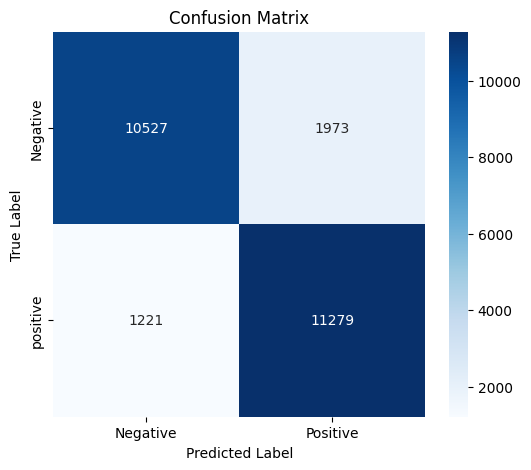

In [ ]:
# confusion matrix for the test data

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

probs = model.predict(x_test, verbose=0)
y_pred = (probs > 0.5).astype(int).ravel()

cm = confusion_matrix(y_true=y_test, y_pred=y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=["Negative", "Positive"],
    yticklabels=["Negative", "positive"]
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()